# Practical work 8: Split and Merge

In this practical work, we implement and test the split and merge algorithm.

In [1]:
#### Usefull libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Usefull functions
def neighbors(b,K):
    """ blockStat*list[blockStat]->list[blockStat]
        returns the list of neighbors of b and elements of K 
    """
    def belongsTo(x,y,a):
        """ int*int*BlockStat -> bool 
            Test if pixel (x,y) belongs to block a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def areNeighbors(a,b):
        """ BlockStat**2 -> bool
            Test if a and b are neighbors
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return belongsTo(x+a[2],y,b) or belongsTo(x-a[2],y,b) or belongsTo(x,y+a[3],b) or belongsTo(x,y-a[3],b)
    N = []
    for n in K:
        if areNeighbors(b,n):
            N.append(n)
    return N

def imshow(I,title=None,size=500,save=False,index=-1):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: 
        if index != -1:
            plt.title(title+"-"+str(index))
        else:
            plt.title(title)
    if(save):
        plt.savefig(f'{title}-{index}.png')
        plt.close()
    else:
        plt.show()
    pass

## Exercise 1

### Question 1
Write the recursive function ``split()`` discussed in tutorial work. 
It takes as input the image, a region, a predicate, and a variable number of arguments. 
The region is a Python formal type ``Block`` defined by:
```python
type Block = tuple[int**4]
```
The function ``split()`` returns a quadtree, a Python formal type, recursivelly defined by:
```python
type QuadTree = list[(QuadTree**4|Block)] 
```

The predicate is a Python function with the following signature:
```python
Array*Block*...->bool
```
It can take a variable number of parameters which correspond to the parameters required by the predicate.

In [2]:
# type Block = tuple[int**4]
# type QuadTree = list[(QuadTree**4|Block)] 

def split(I,R,*args):
    """ Array*Block*(Array*Block*...->bool)*... -> 4-aire
        Performs a quadtree splitting of image I drived by a predicate
    """
    x,y,n,m = R
    ndiv = n//2
    mdiv = m//2
    if predsplit(I,R,*args):
        no = split(I, (x,     y,     ndiv,mdiv), *args)
        ne = split(I, (x,     y+mdiv,ndiv,mdiv), *args)
        so = split(I, (x+ndiv,y,     ndiv,mdiv), *args)
        se = split(I, (x+ndiv,y+mdiv,ndiv,mdiv), *args)
        return [no,ne,so,se]
    return [R]

### Question 2
Write the function ```predsplit(I,B,*args)``` with signature:
```python
Array*Block*... -> bool
```
that returns True if the standard deviation of image ``I`` computed in region ``B`` is greater than the first value of argument ``*args`` (it can be accessed simply by ``*args[0]``).

In [3]:
def predsplit(I,R,*args):
    """ Array*Block*... -> bool
    """ 
    x,y,n,m = R
    std = I[x:x+n,y:y+m].std() 
    return std > args[0] and n > args[1] and m > args[2]

### Question 3
Write the function ``listRegions()`` which applies a depth-first search on the quadtree given as parameter, and returns the list of the leaves of the quadtree. 

Some recalls about lists in Python;
 - Initialization: `L = []` (empty list)
 - Add a element `a` into a list `L`: `L.append(a)`

In [4]:
def listRegions(L):
    """ QuadTree -> list[Block]
    """
    res = []
    if len(L) == 1:
        res.append(L[0])
    else:
        for l in L:
            res += listRegions(l)
    return res

### Question 4
Test your codes on the synthetic image ``img_test`` seen in tutorial work. Print the value returned by ``split()`` as well as the one returned by ``listRegions()``. 

In [5]:
seuil_predsplit = 0
seuil_n = 2
seuil_m = 2
R_init = [0, 0, img_test.shape[0], img_test.shape[1]]

tree = split(img_test, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)

print(tree)
print("=================")
print(listreg)

[[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
[(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


### Question 5
Write the function ```drawRegions(L,I)``` which takes as arguments a list of regions, an image, and returns an image  where the boundaries of each region have been traced with red color. Indication: the returned image is a hypermatrix of dimension 3, the third dimension is of size 3 and encodes the red, green and blue components of a RGB colorspace. Test the function on the previous example.

In [6]:
def drawRegions(L,I):
    """ list[Block]*Array -> Array
        parcours de la liste dessin des régions 
    """
    
    newimage = I.copy()
    for e in L:
        x,y,n,m = e
        newimage[x:(x+n),y] = 255
        newimage[x,y:(y+m)] = 255
    
    mask = newimage.copy()
    mask[mask<255] = 1
    mask[mask>=255] = 0
        
    return np.stack((newimage,I*mask,I*mask),axis=2)

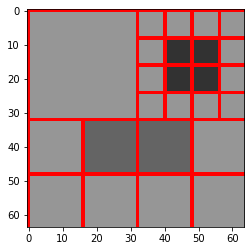

In [7]:
borderimg = drawRegions(listreg, img_test)
plt.imshow(borderimg )
plt.show()

### Question 6
Add a Gaussian noise with standard deviation 5 to the image ``img_test``. 
Apply the quadtree splitting on the noisy image by adjusting the threshold to obtain the same result as in the previous question. 
Which threshold value should be chosen? Does this make sense to you?

Hint: use the Numpy function ``random.randn()`` which generates random values according to a normal distribution (Gaussian distribution of null mean and variance 1). To obtain realizations of a Gaussian distribution of standard deviation $\sigma$, it is sufficient to multiply by $\sigma$ the realizations of a normal distribution. 

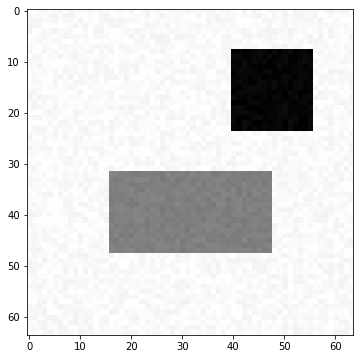

In [8]:
from numpy import random
sigma = 5

def apply_gauss(I, sigma):
    n,m = I.shape
    new_I = np.zeros(I.shape)
    for i in range(n):
        for j in range(m):
            new_I[i][j] = I[i][j] + (random.rand() * sigma)
    return new_I

img_test_gauss = apply_gauss(img_test, sigma)           
imshow(img_test_gauss)

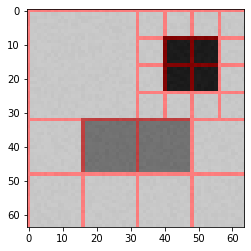

In [9]:
seuil_predsplit = sigma # sigma pour retrouver la meme chose
seuil_n = 2
seuil_m = 2
R_init = [0, 0, img_test_gauss.shape[0], img_test_gauss.shape[1]]

tree = split(img_test_gauss, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, img_test)

plt.imshow(img_test_gauss)
plt.imshow(borderimg, alpha=0.5)
plt.show()

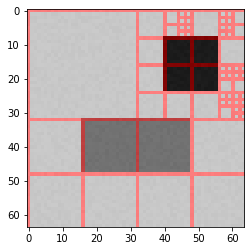

In [10]:
seuil_predsplit = sigma-3.5 # si on mets moins que sigma defaut de segmentation 
seuil_n = 2
seuil_m = 2
R_init = [0, 0, img_test_gauss.shape[0], img_test_gauss.shape[1]]

tree = split(img_test_gauss, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, img_test)

plt.imshow(img_test_gauss)
plt.imshow(borderimg, alpha=0.5)
plt.show()

## Exercise 2

Experiment the split algorithm on the 4 natural images provided. For each image try to find the threshold that seems to you visually the best. Display the number of regions obtained after splitting.

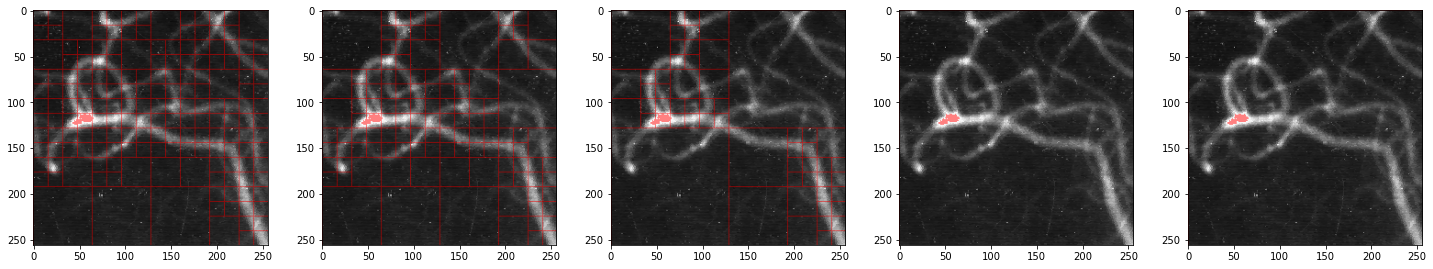

In [11]:
#recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = i*10
    seuil_n = 20
    seuil_m = 20
    fig.add_subplot(n,n,i)
    R_init = [0, 0, angio.shape[0], angio.shape[1]]
    tree = split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, angio)
    plt.imshow(angio) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

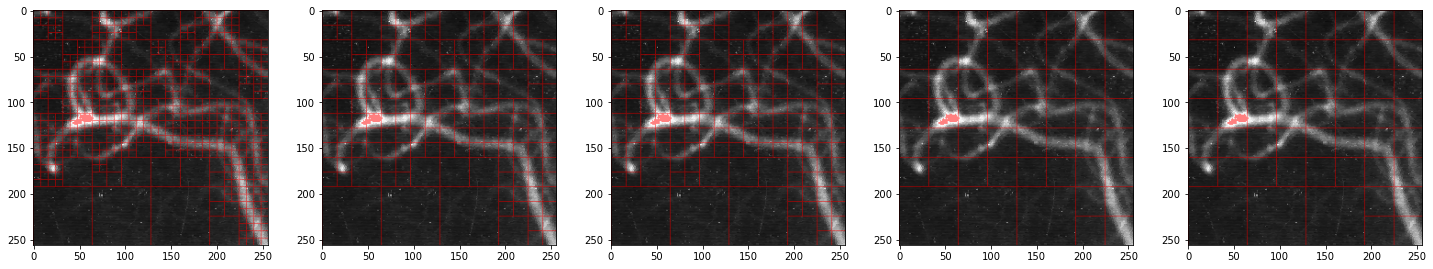

In [12]:
#recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = 10
    seuil_n = i*10
    seuil_m = i*10
    fig.add_subplot(n,n,i)
    R_init = [0, 0, angio.shape[0], angio.shape[1]]
    tree = split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, angio)
    plt.imshow(angio) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

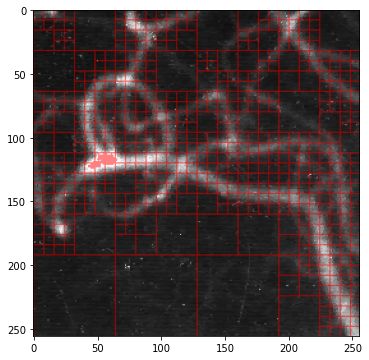

In [13]:
# recherche des meilleurs parametres
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, angio.shape[0], angio.shape[1]]
tree = split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, angio)
plt.imshow(angio)
plt.imshow(borderimg, alpha=0.5)
plt.show()

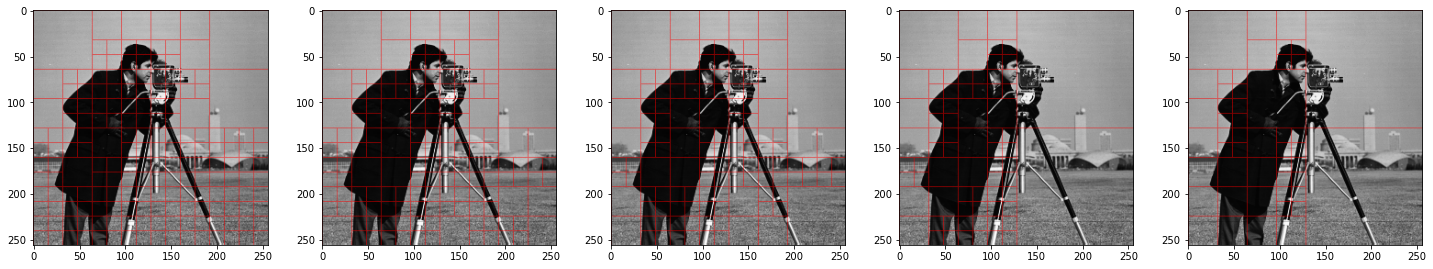

In [14]:
# recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = i*10
    seuil_n = 20
    seuil_m = 20
    fig.add_subplot(n,n,i)
    R_init = [0, 0, cam.shape[0], cam.shape[1]]
    tree = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, cam)
    plt.imshow(cam) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

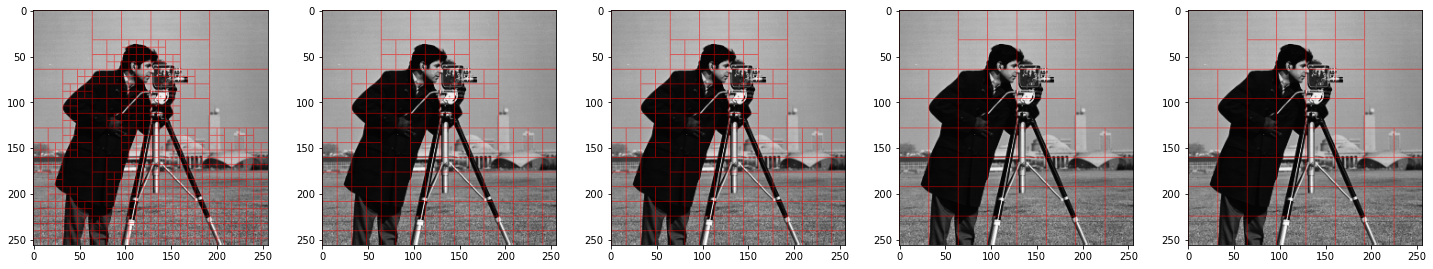

In [15]:
# recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = 10
    seuil_n = i*10
    seuil_m = i*10
    fig.add_subplot(n,n,i)
    R_init = [0, 0, cam.shape[0], cam.shape[1]]
    tree = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, cam)
    plt.imshow(cam) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

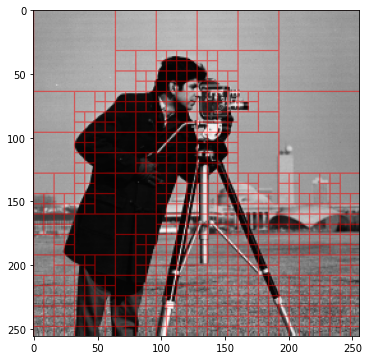

In [16]:
# image avec parametre optimal
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
tree = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, cam)
plt.imshow(cam)
plt.imshow(borderimg, alpha=0.5)
plt.show()

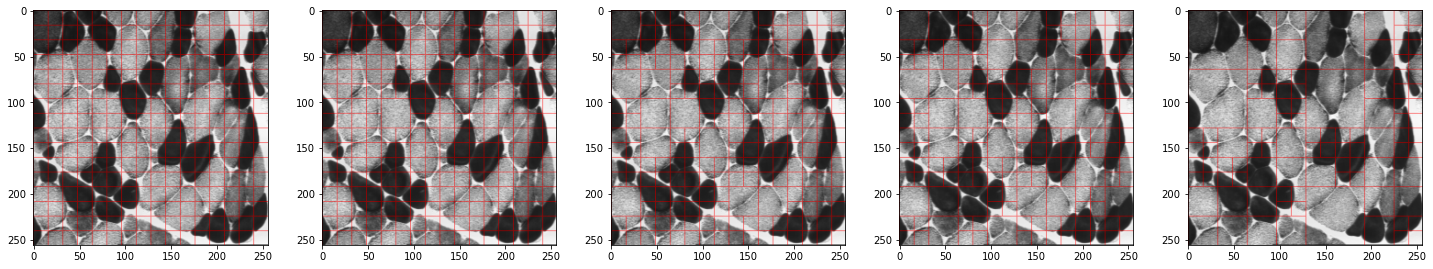

In [17]:
#recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = i*10
    seuil_n = 20
    seuil_m = 20
    fig.add_subplot(n,n,i)
    R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
    tree = split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, muscle)
    plt.imshow(muscle) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

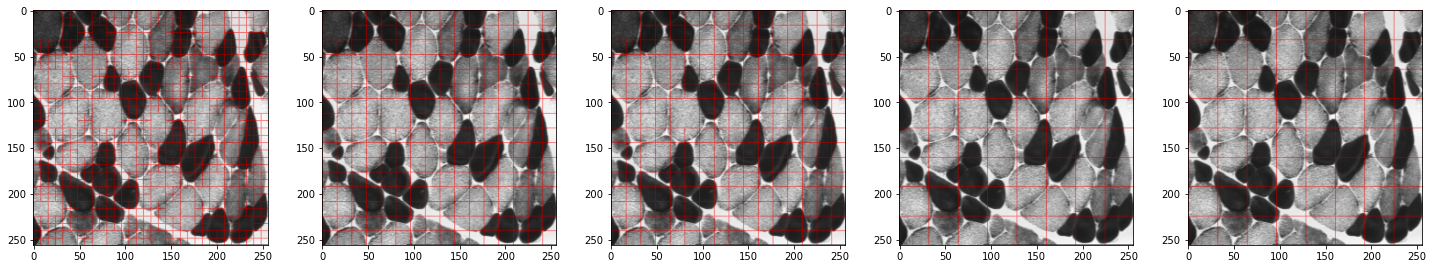

In [18]:
# recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = 20
    seuil_n = i*10
    seuil_m = i*10
    fig.add_subplot(n,n,i)
    R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
    tree = split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, muscle)
    plt.imshow(muscle) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

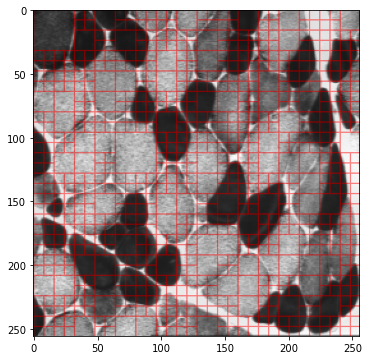

In [19]:
# image avec parametre optimal
seuil_predsplit = 20
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
tree = split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, muscle)
plt.imshow(muscle) 
plt.imshow(borderimg, alpha=0.5)
plt.show()

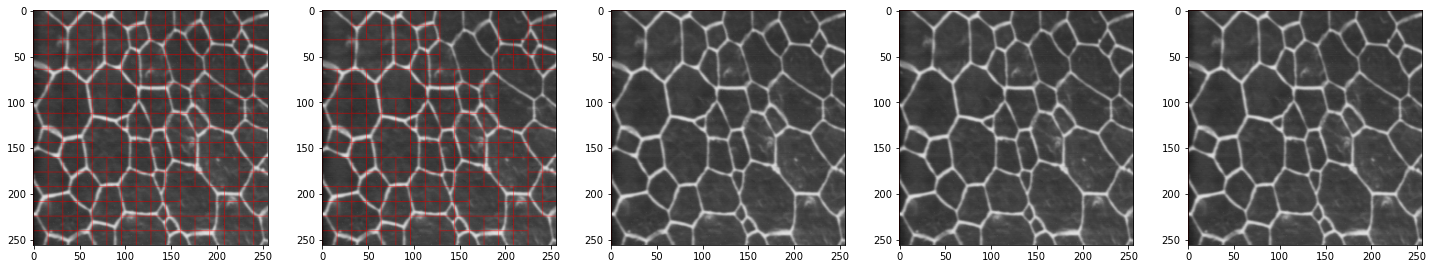

In [20]:
# recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = i*10
    seuil_n = 20
    seuil_m = 20
    fig.add_subplot(n,n,i)
    R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
    tree = split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, prisme)
    plt.imshow(prisme) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

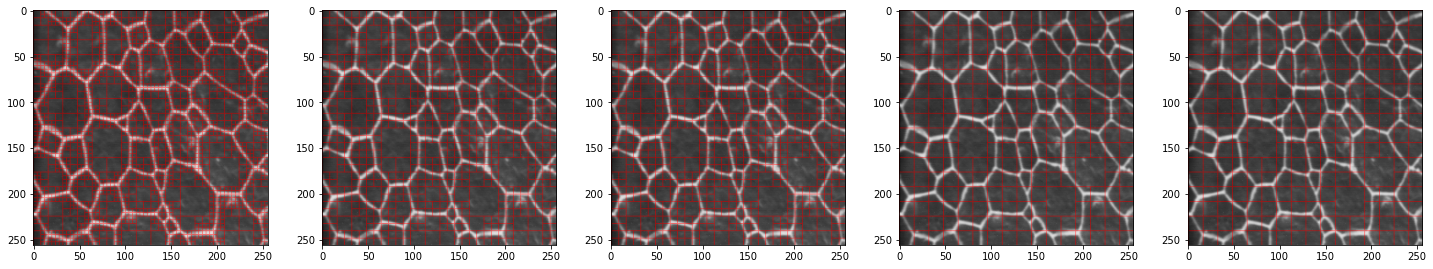

In [21]:
# recherche des meilleurs parametres
n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = 10
    seuil_n = i*5
    seuil_m = i*5
    fig.add_subplot(n,n,i)
    R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
    tree = split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, prisme)
    plt.imshow(prisme) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

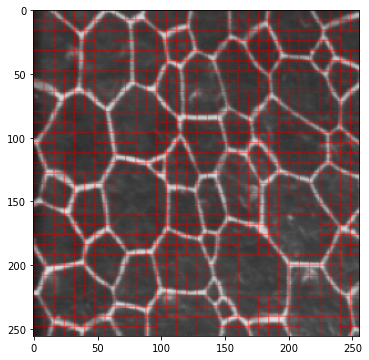

In [22]:
# image avec parametre optimal
seuil_predsplit = 10
seuil_n = 15
seuil_m = 1
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
tree = split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, prisme)
plt.imshow(prisme)
plt.imshow(borderimg, alpha=0.5)
plt.show()

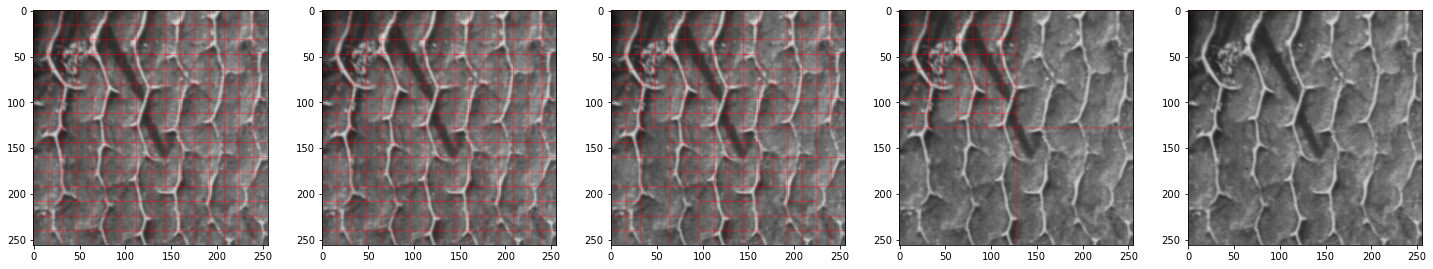

In [23]:
# recherche des meilleurs parametres image avec enormement de region
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = i*5
    seuil_n = 20
    seuil_m = 20
    fig.add_subplot(n,n,i)
    R_init = [0, 0, seiche.shape[0], seiche.shape[1]]
    tree = split(seiche, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, seiche)
    plt.imshow(seiche) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

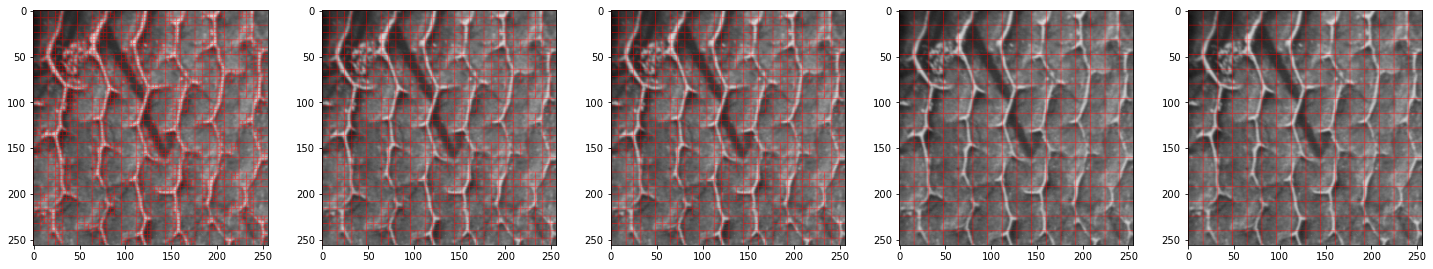

In [24]:
# recherche des meilleurs parametres image avec enormement de region
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    seuil_predsplit = 10
    seuil_n = i*5
    seuil_m = i*5
    fig.add_subplot(n,n,i)
    R_init = [0, 0, seiche.shape[0], seiche.shape[1]]
    tree = split(seiche, R_init, seuil_predsplit, seuil_n, seuil_m)
    listreg = listRegions(tree)
    borderimg = drawRegions(listreg, seiche)
    plt.imshow(seiche) 
    plt.imshow(borderimg, alpha=0.5)
plt.show()

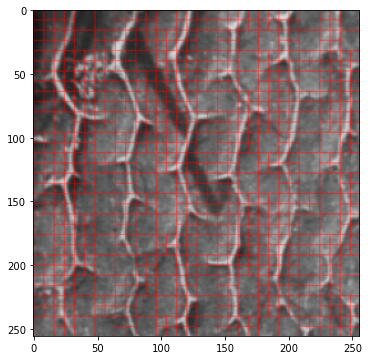

In [25]:
# image avec parametre optimal
seuil_predsplit = 10
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, seiche.shape[0], seiche.shape[1]]
tree = split(seiche, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(tree)
borderimg = drawRegions(listreg, seiche)
plt.imshow(seiche)
plt.imshow(borderimg, alpha=0.5)
plt.show()

On peut conclure que la partie la plus importante est le treeshold. Sur l'exercice 4. Nous prendrons des tailles de m et n de 10 ou 15 en fonction de la photo

## Exercise 3
### Question 1
Modify the function ``listRegions(L)`` to make it a function ``listRegionsStat(L,I)`` which computes the list of leaves of the quadtree ``L``. Each element of this list will be enriched with three scalar values: the first being the size, the second the mean and the third the variance of pixel values of the block in the image ``I``. This function then returns a list whose elements have the following formal type:
```python
type BlockStat = tuple[int**4,int,float**2]
```

The first four values are those of the ``Block`` type, the fifth is the size of the block (in number of pixels) and the last two values are the mean and variance calculated over the region.

In [26]:
# type BlockStat = tuple[int**4,int,float**2]

def listRegionsStat(L,I):
    """ QuadTree*Array -> list[BlockStat] """
    res = []
    if len(L) == 1:
        LI = L[0]
        R = I[LI[0]:LI[0]+LI[2],LI[1]:LI[1]+LI[3]]
        Newvalue = (LI[0],LI[1],LI[2],LI[3], R.size, R.mean(), R.var())
        return([Newvalue])
    else:
        for l in L:
            res += listRegionsStat(l,I)
    return res

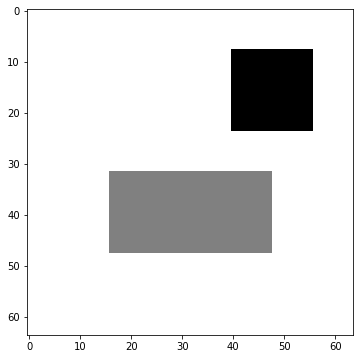

[(0, 0, 32, 32, 1024, 150.0, 0.0), (0, 32, 8, 8, 64, 150.0, 0.0), (0, 40, 8, 8, 64, 150.0, 0.0), (8, 32, 8, 8, 64, 150.0, 0.0), (8, 40, 8, 8, 64, 50.0, 0.0), (0, 48, 8, 8, 64, 150.0, 0.0), (0, 56, 8, 8, 64, 150.0, 0.0), (8, 48, 8, 8, 64, 50.0, 0.0), (8, 56, 8, 8, 64, 150.0, 0.0), (16, 32, 8, 8, 64, 150.0, 0.0), (16, 40, 8, 8, 64, 50.0, 0.0), (24, 32, 8, 8, 64, 150.0, 0.0), (24, 40, 8, 8, 64, 150.0, 0.0), (16, 48, 8, 8, 64, 50.0, 0.0), (16, 56, 8, 8, 64, 150.0, 0.0), (24, 48, 8, 8, 64, 150.0, 0.0), (24, 56, 8, 8, 64, 150.0, 0.0), (32, 0, 16, 16, 256, 150.0, 0.0), (32, 16, 16, 16, 256, 100.0, 0.0), (48, 0, 16, 16, 256, 150.0, 0.0), (48, 16, 16, 16, 256, 150.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0), (32, 48, 16, 16, 256, 150.0, 0.0), (48, 32, 16, 16, 256, 150.0, 0.0), (48, 48, 16, 16, 256, 150.0, 0.0), (0, 64, 64, 64, 0, nan, nan), (64, 0, 64, 64, 0, nan, nan), (64, 64, 64, 64, 0, nan, nan), (0, 128, 128, 128, 0, nan, nan), (128, 0, 128, 128, 0, nan, nan), (128, 128, 128, 128, 0, nan, n

C:\Users\karna\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\karna\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\karna\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-26-e78c4c77e5c9>:9: RuntimeWarning: Mean of empty slice.
  Newvalue = (LI[0],LI[1],LI[2],LI[3], R.size, R.mean(), R.var())
C:\Users\karna\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-26-e78c4c77e5c9>:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  Newvalue = (LI[0],LI[1],LI[2],LI[3], R.size, R.mean(), R.var())


In [27]:
imshow(img_test)
qt= split(img_test, R_init, seuil_predsplit, seuil_n, seuil_m)
l = listRegionsStat(qt,img_test)
print(l)

### Question 2
In the remainder, the formal type is considered:
```python
type Region = list[BlocStats]
```
A region, as seen during the tutorial work, is therefore a list of blocks. Write the predicate ``predmerge(b,R,*args)`` as seen in tutorial work. This function returns ``True`` if the ``b`` block should merge into the ``R`` region. If a merge happens, then the first item of ``R`` will have its statistics updated to describe the statistics of the region ``R`` merged with `b`.

In [28]:
def predmerge(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    if b in R: return False
    
    #recuperation des anciennes valeurs
    x,y,w,h, size, mub,sigmab = b
    xr,yr,wr,hr, sizer, mur,sigmar = R[0]

    #nouvelle taille
    n = size + sizer
    
    mu = (size*mub + sizer*mub)/n
    
    sigma = 1/n * (size*(sigmab**2+mub**2) + sizer*(sigmar**2+mur**2))-mu**2
    
    if sigma < args[0]:
        R[0] = xr,yr,wr,hr,n,mu,sigma
        return True
    
    return False

### Question 3
Using `predmerge()` and `neighbors()` functions, given at the beginning of the notebook, write the function ``merge()`` discussed in tutorial work (exercise 7.6).

Recalls on Python lists:
- Remove an element `a` from a list `L`: `L.remove(a)`
- Test if `a` belongs to a list `L`: `a in L` 
- Iterate the elements of a list `L`: `for a in L:`
- Access to an element of a list: as with numpy arrays

In [29]:
def merge(S,I,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    L = []
    if len(K) > 0:
        while K: 
            b = K.pop(0) #renvoie le dernier element 
            R = [b]
            N = neighbors(b,K)
            for bn in N:#parcours des voisins
                if predmerge(bn,R,*args):
                    K.remove(bn)
                    R += [bn]
                    N += [i for i in neighbors(bn,K) if i not in N]
            L.append(R)
    return L

### Question 4
Test the previous functions using the synthetic image `img_test`. In particular, check that merge() returns a list of 3 elements (i.e. 3 regions).

In [30]:
seuil_predsplit = 0
seuil_n = 2
seuil_m = 2
R_init = [0, 0, img_test.shape[0], img_test.shape[1]]
qt=split(img_test, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,img_test,5)

assert len(M) == 3

### Question 5
Write a function ``regions(LR,shape)`` that takes as arguments a list of regions (such as returned by the function ``merge()``) and an image size, and returns an image of the regions. Each region will be colored with the gray level corresponding to the average of the region. The ``shape`` parameter gives the size of the image to be produced. 

Test the function on the previous example.

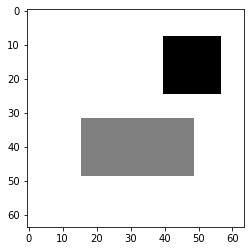

In [31]:
def regions(LR,shape):
    """ list[Region]*tuple[int,int] -> Array """
    newimg = np.zeros(shape)
    for R in LR:
        moyenne = 0
        for r in R: moyenne += r[5]
        moyenne /= len(R)
        for r in R:
            newimg[r[0]:r[0]+r[2]+1,r[1]:r[1]+r[3]+1] = moyenne
    return newimg

plt.imshow(regions(M,img_test.shape))

## Exercise 4: experiments
### Question 1
Test the function ``merge()`` on the images ``angio``, ``cam``, ``muscle``, ``prisme`` and ``seiche``. Try to produce the best segmentations.

In [32]:
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

nombre de region 2684


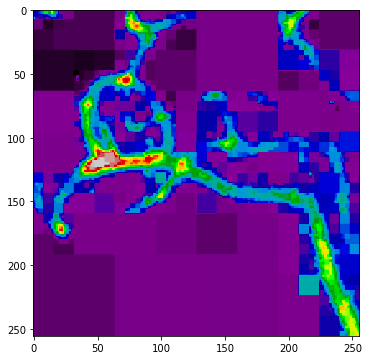

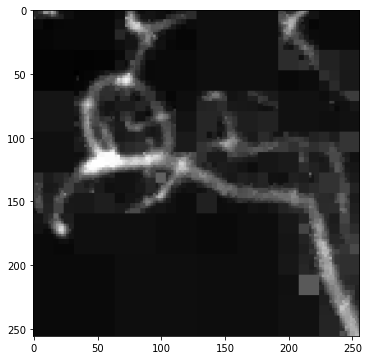

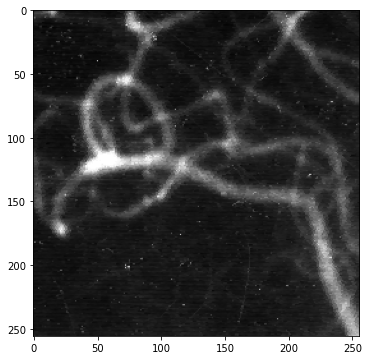

In [33]:
seuil_predsplit = 13 # valeur optimal
seuil_n = 3
seuil_m = 3
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, angio.shape[0], angio.shape[1]]
qt=split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,angio,10)
print("nombre de region",len(M))
plt.imshow(regions(M,angio.shape),cmap = "nipy_spectral")
imshow(regions(M,angio.shape))
imshow(angio)

nombre de region 343


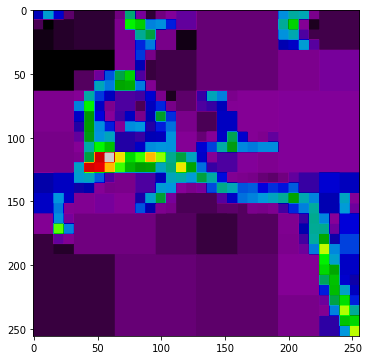

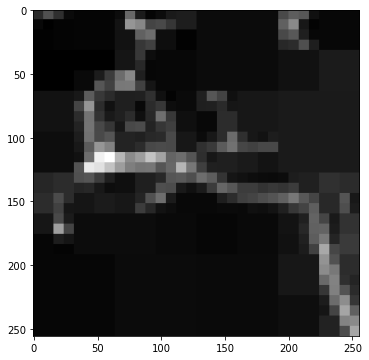

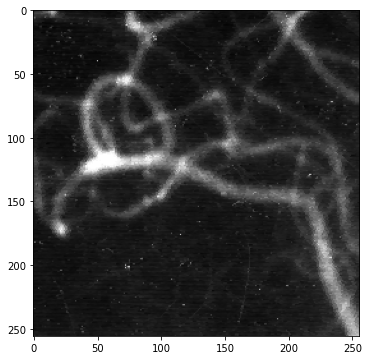

In [34]:
seuil_predsplit = 19 # valeurs limites avant la pertre de la boucle central
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, angio.shape[0], angio.shape[1]]
qt=split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,angio,10)
print("nombre de region",len(M))
plt.imshow(regions(M,angio.shape),cmap = "nipy_spectral")
imshow(regions(M,angio.shape))
imshow(angio)

nombre de region 214


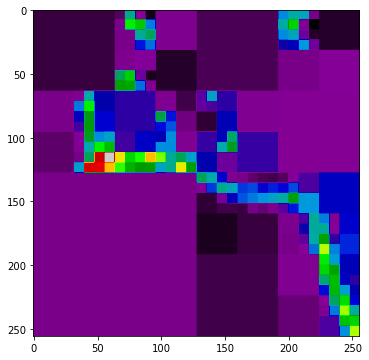

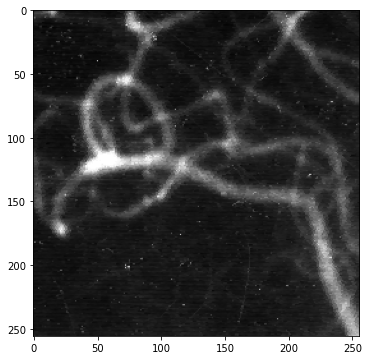

In [35]:
seuil_predsplit = 23 # perte de la partie apres la boucle 
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, angio.shape[0], angio.shape[1]]
qt=split(angio, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,angio,10)
print("nombre de region",len(M))
plt.imshow(regions(M,angio.shape),cmap = "nipy_spectral")
imshow(angio)

nombre de region 1878


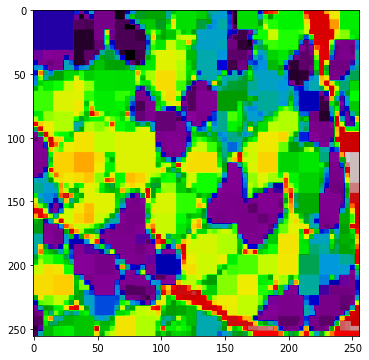

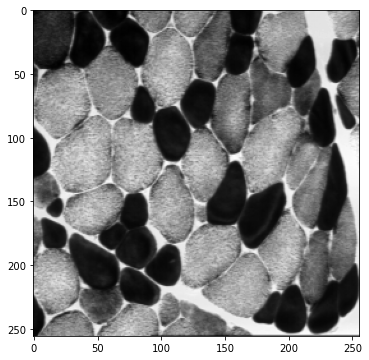

In [36]:
seuil_predsplit = 20 # valeur optimal
seuil_n = 4
seuil_m = 4
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
qt=split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,muscle,5)
print("nombre de region",len(M))
plt.imshow(regions(M,muscle.shape),cmap = "nipy_spectral")
imshow(muscle)

nombre de region 944


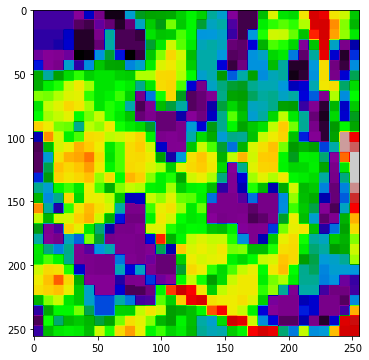

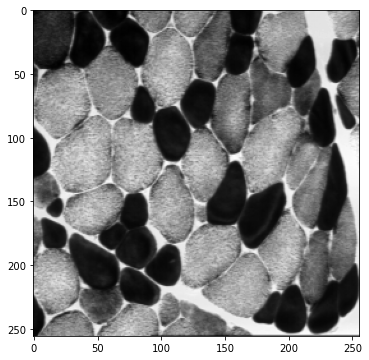

In [37]:
seuil_predsplit = 10 # valeur limite ou on voit toute les delimitations
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
qt=split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,muscle,5)
print("nombre de region",len(M))
plt.imshow(regions(M,muscle.shape),cmap = "nipy_spectral")
imshow(muscle)

nombre de region 390


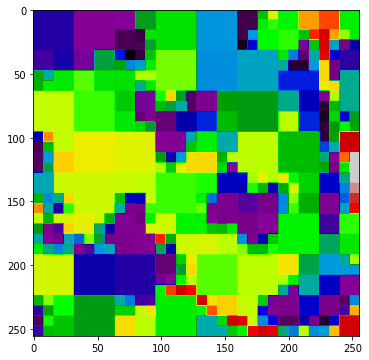

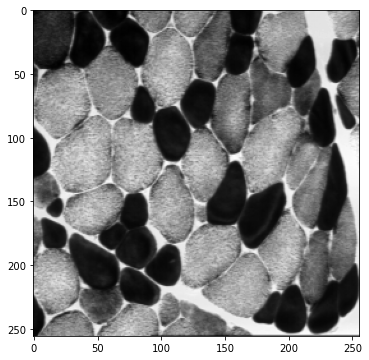

In [38]:
seuil_predsplit = 39# valeurs limite de la perte de contraste des cellules grise fonce et les autres
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, muscle.shape[0], muscle.shape[1]]
qt=split(muscle, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,muscle,5)
print("nombre de region",len(M))
plt.imshow(regions(M,muscle.shape),cmap = "nipy_spectral")
imshow(muscle)

nombre de region 856


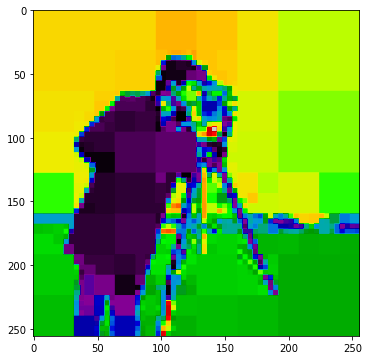

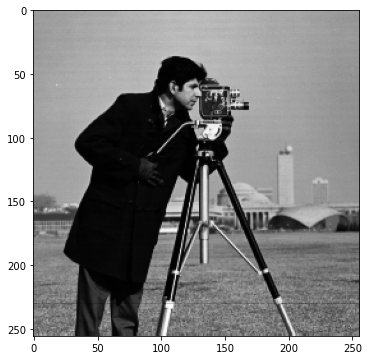

In [39]:
seuil_predsplit = 30 # valeur optimal
seuil_n = 6
seuil_m = 6
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

nombre de region 565


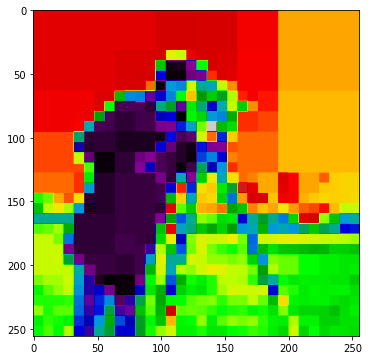

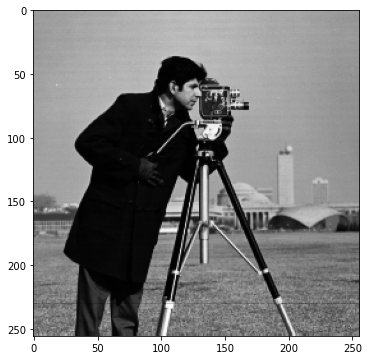

In [40]:
seuil_predsplit = 10 # valeurs limite avant de perdre la main du cameraman et la partie de l'appareil devant son manteau
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

nombre de region 262


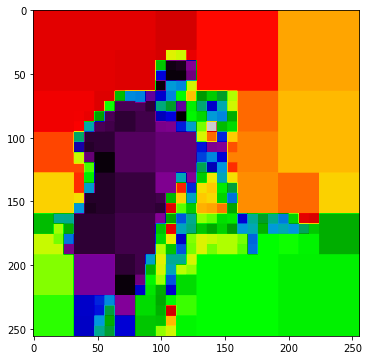

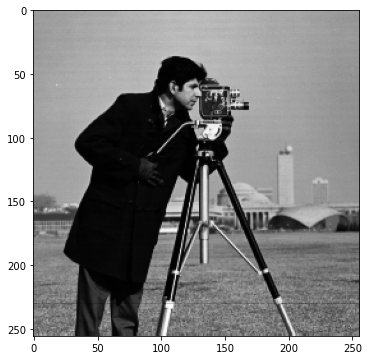

In [41]:
seuil_predsplit = 38 # valeurs limite pour distinguer la camera
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

nombre de region 763


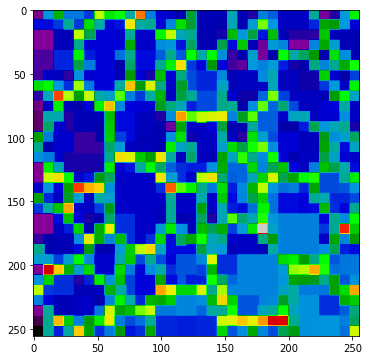

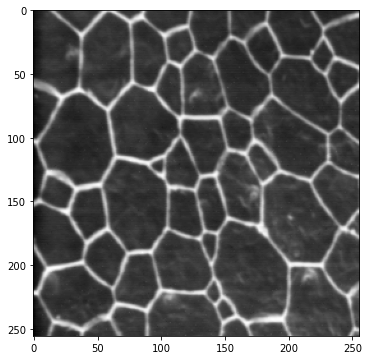

In [42]:
seuil_predsplit = 10 # valeur optimal
seuil_n = 8 # En dessous de 8 apparition d'un bug
seuil_m = 8
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
qt=split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,prisme,5)
print("nombre de region",len(M))
plt.imshow(regions(M,prisme.shape),cmap = "nipy_spectral")
imshow(prisme)

nombre de region 669


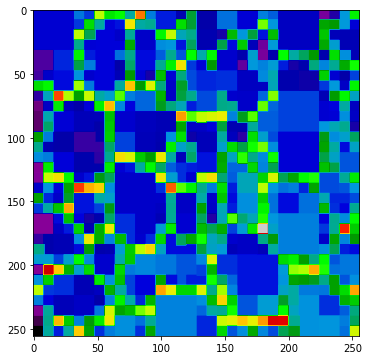

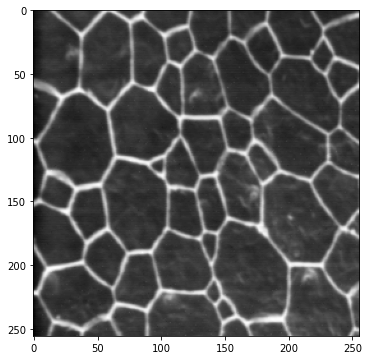

In [43]:
seuil_predsplit = 16 # valeur limite ou on peut voir toute les delimitations
seuil_n = 15
seuil_m = 15 
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
qt=split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,prisme,5)
print("nombre de region",len(M))
plt.imshow(regions(M,prisme.shape),cmap = "nipy_spectral")
imshow(prisme)

nombre de region 595


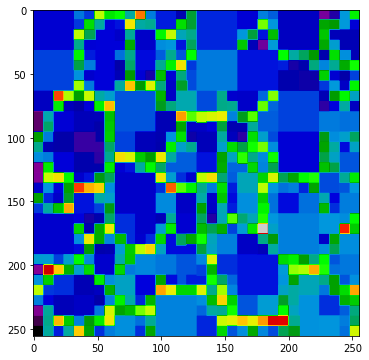

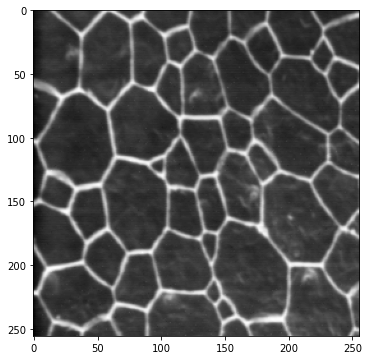

In [44]:
seuil_predsplit = 19 # debut de la perte des lignes
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
qt=split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,prisme,5)
print("nombre de region",len(M))
plt.imshow(regions(M,prisme.shape),cmap = "nipy_spectral")
imshow(prisme)

nombre de region 282


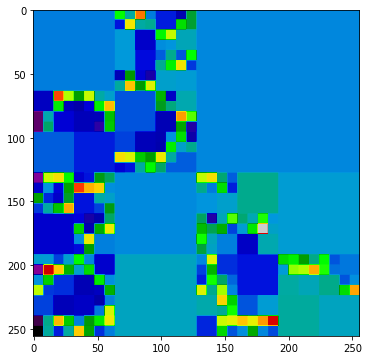

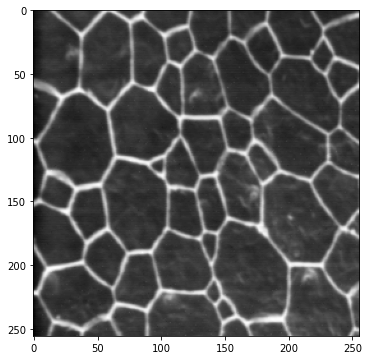

In [45]:
seuil_predsplit = 25 # perte des lignes
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, prisme.shape[0], prisme.shape[1]]
qt=split(prisme, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,prisme,5)
print("nombre de region",len(M))
plt.imshow(regions(M,prisme.shape),cmap = "nipy_spectral")
imshow(prisme)

nombre de region 2138


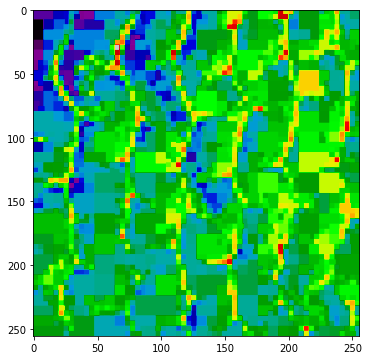

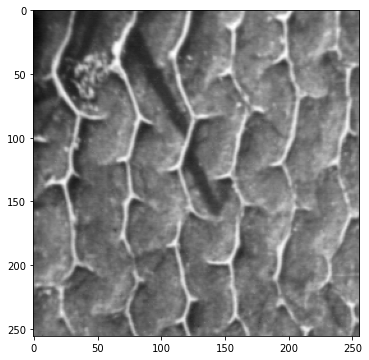

In [46]:
seuil_predsplit = 8 # derniere valeurs ou on distingue l'ensemble des lignes entre les cellules
seuil_n = 7 # parametre obligatoire si on veut bien discreminer les parties
seuil_m = 7 # parametre obligatoire si on veut bien discreminer les parties
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, seiche.shape[0], seiche.shape[1]]
qt=split(seiche, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,seiche,5)
print("nombre de region",len(M))
plt.imshow(regions(M,seiche.shape),cmap = "nipy_spectral")
imshow(seiche)

nombre de region 852


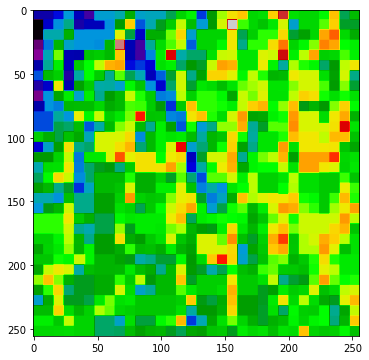

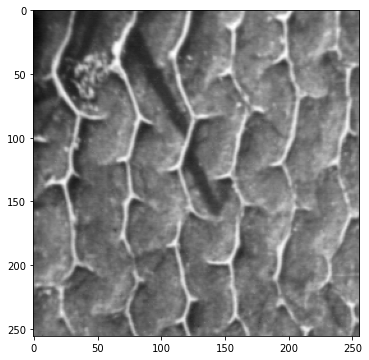

In [47]:
seuil_predsplit = 8 # valeur de passage a une segmentation non efficace
seuil_n = 8 # valeur de passage a une segmentation non efficace
seuil_m = 8 # valeur de passage a une segmentation non efficace
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, seiche.shape[0], seiche.shape[1]]
qt=split(seiche, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,seiche,5)
print("nombre de region",len(M))
plt.imshow(regions(M,seiche.shape),cmap = "nipy_spectral")
imshow(seiche)

### Question 2
The result of the merge algorithm highly depends on how you visit the regions. One can then sort the leaves of the quadtree, for example, from the smallest to the largest blocks, or the opposite (use the Python function ``sorted()``). 
The same question arises when calculating the set of neighbors of the merged region. Should they be sorted? If yes, according to which criteria? their size? their proximity? 
Obviously there is no universal answer but it should be adapted to each type of problem. 
Do some tests to see the influence of these sortings on the result of the merger.

nombre de region 565


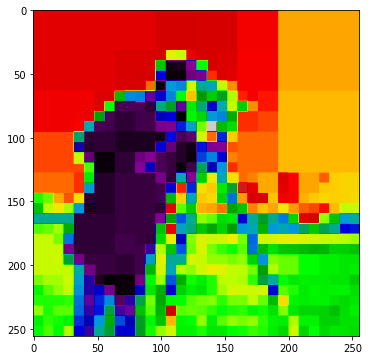

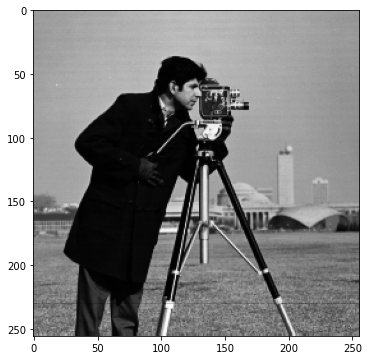

In [48]:
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

In [49]:
def merge2(S,I,*args):
    K = listRegionsStat(S,I)
    K = sorted(K, key = lambda x : -x[4])
    L = []
    if len(K) > 0:
        while K: 
            b = K.pop(0) # renvoie le dernier element 
            R = [b]
            N = neighbors(b,K)
            for bn in N: # parcours des voisins
                if predmerge(bn,R,*args):
                    K.remove(bn)
                    R += [bn]
                    N += [i for i in neighbors(bn,K) if i not in N]
            L.append(R)
    return L

nombre de region 561


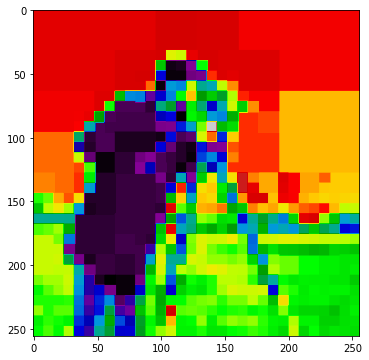

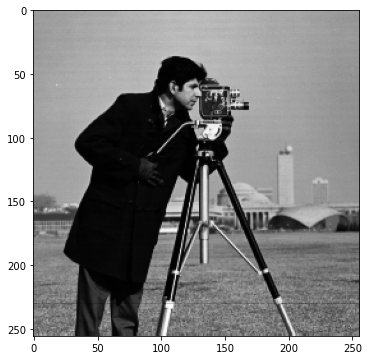

In [50]:
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge2(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

In [51]:
def merge3(S,I,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    K = sorted(K,reverse=True)
    L = []
    if len(K) > 0:
        while K: 
            b = K.pop(0) #renvoie le dernier element 
            R = [b]
            N = neighbors(b,K)
            for bn in N:#parcours des voisins
                if predmerge(bn,R,*args):
                    K.remove(bn)
                    R += [bn]
                    N += [i for i in neighbors(bn,K) if i not in N]
            L.append(R)
    return L

nombre de region 550


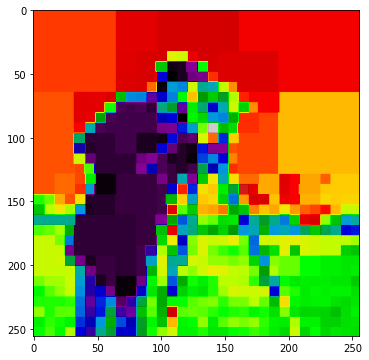

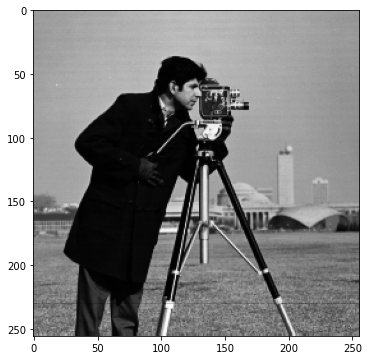

In [52]:
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge3(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

In [53]:
def merge4(S,I,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S,I)
    K = K
    L = []
    if len(K) > 0:
        while K: 
            b = K.pop(0) #renvoie le dernier element 
            R = [b]
            N = sorted(neighbors(b,K),)
            for bn in N:#parcours des voisins
                if predmerge(bn,R,*args):
                    K.remove(bn)
                    R += [bn]
                    N += [i for i in neighbors(bn,K) if i not in N]
            L.append(R)
    return L

nombre de region 550


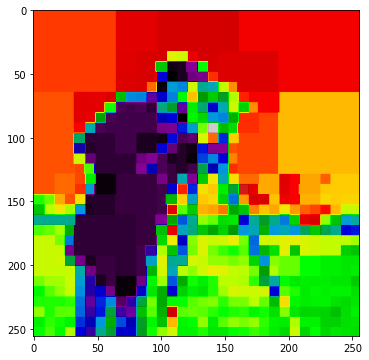

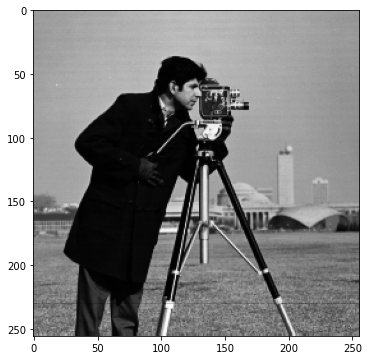

In [54]:
seuil_predsplit = 10
seuil_n = 10
seuil_m = 10
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt=split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge3(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
imshow(cam)

On voit une difference dans le nombre de region retournée en fonction de la manieres dont ont trie nos valeurs ou notre liste de voisin. La difference est de moins de 5% du nombre de regions observes normalement 
 

### Question 3 (bonus)
Imagine and experiment alternative predicates for both the split and the merge steps. It is possible to use edges-based predicates, and also to combine with variance-based predicates.


# Test avec different predicat pour split


## Predsplit de base

In [55]:
def predsplit(I,R,*args):
    x,y,n,m = R
    std = I[x:x+n,y:y+m].std()
    return std > args[0] and n > args[1] and m > args[2]

nombre de region 856


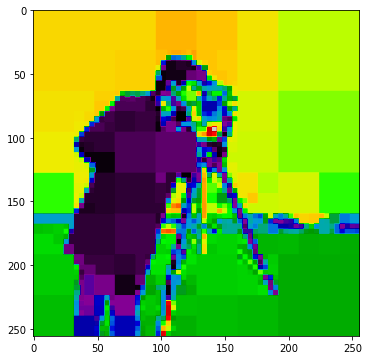

In [56]:
seuil_predsplit = 30
seuil_n = 6
seuil_m = 6
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()

## Predsplit avec moyenne

In [57]:
def predsplit(I,R,*args):
    x,y,n,m = R
    mean = I[x:x+n,y:y+m].mean()
    return mean > args[0] and n > args[1] and m > args[2]

nombre de region 779


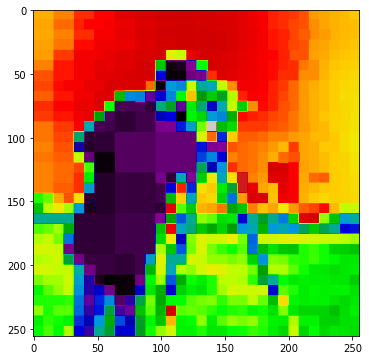

In [58]:
seuil_predsplit = 20
seuil_n = 15
seuil_m = 15
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()

## Predsplit avec mediane

In [59]:
def predsplit(I,R,*args):
    x,y,n,m = R
    median = np.median(I[x:x+n,y:y+m])
    return median > args[0] and n > args[1] and m > args[2]

nombre de region 832


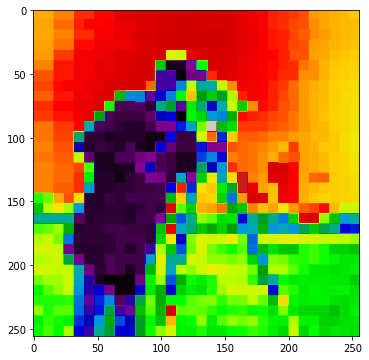

In [60]:
seuil_predsplit = 10
seuil_n = 12
seuil_m = 12
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()

## Predsplit avec comptage des bords

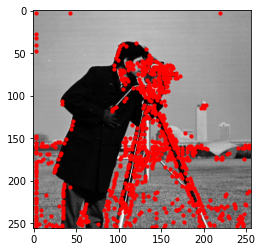

In [61]:
from scipy.signal import convolve2d
from scipy.linalg import det

def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    n, m = image.shape
    Ix, Iy = Sobel(image)
    A = Ix * Ix
    B = Iy * Iy
    C = Ix * Iy
    sigma = ((round((scale-1)/2+1))-1)/3
    w = gaussianKernel(sigma)
    wA = convolve2d(w,A)
    wB = convolve2d(w,B)
    wC = convolve2d(w,C)
    M = np.zeros((n,m,2,2))
    R = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i][j][0][0] = wA[i][j]
            M[i][j][1][1] = wB[i][j]
            M[i][j][1][0] = wC[i][j]
            M[i][j][0][1] = wC[i][j]
            detM = det(M[i][j])
            traceM = np.trace(M[i][j])
            R[i][j] = detM - kappa * traceM**2
    return R

def Sobel(I):
    """ Array*double -> Array """
    Sx = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])
    Sy = np.array([[1,  2, 1],
                   [0,  0, 0],
                   [-1,-2,-1]])
    Ix = convolve2d(I,Sx)
    Iy = convolve2d(I,Sy)
    return Ix, Iy

def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

def thresholdR(R, thres):
    return np.where(R > thres, 1, 0)

def rnms(R, Rbin, taille_fenetre):
    new_image = np.zeros((R.shape))
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if Rbin[i][j] == 0:
                    continue
            if(i < 255 and j < 255):
                neighbors = []
                for k in range(int(-taille_fenetre/2), int(taille_fenetre/2+1), 1):
                    for l in range(int(-taille_fenetre/2), int(taille_fenetre/2+1), 1):
                        if i+k < R.shape[0] and j+l < R.shape[1]:
                            neighbors.append(R[i+k][j+l])
                w = np.max(neighbors)
                if(w == R[i][j]):
                    new_image[i][j] = 1
    return new_image

def cornerDetector(image, scale, kappa, thres, taille_fenetre):
    new_image = np.zeros((image.shape))
    R = computeR(image,scale,kappa)
    Rbin = thresholdR(R,thres)
    new_image = rnms(R,Rbin,taille_fenetre)
    return new_image

thres = 10**5.8
taille_fenetre = 3
kappa = 0.04
scale = 2.14

coins_image = cornerDetector(cam, scale, kappa, thres, taille_fenetre) 

plt.figure()
plt.imshow(cam)
coins = np.nonzero(coins_image)
plt.scatter(coins[1],coins[0],s=10,c="#ff0000" )
plt.show()

In [62]:
def predsplit(I,R,*args):
    x,y,n,m = R
    thres = 10**5.8 # Le probleme vient du fait qu'il y ait trop de coins au niveau de l'herbe et pas assez au niveau du manteau de la personne comme vu ci dessus
    taille_fenetre = 3
    kappa = 0.04
    scale = 2.14
    img = cornerDetector(I[x:x+n,y:y+m], scale, kappa, thres, taille_fenetre)
    coins = np.nonzero(img)
    n_coins = len(coins[0])
    return n_coins > args[0] and n > args[1] and m > args[2]

nombre de region 251


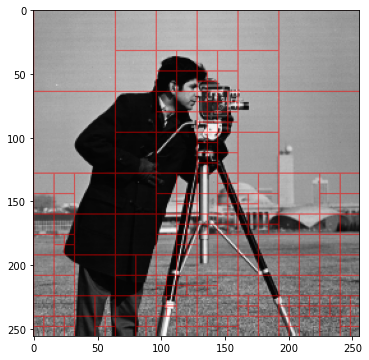

In [63]:
seuil_predsplit = 10
seuil_n = 5
seuil_m = 5
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(qt)
borderimg = drawRegions(listreg, cam)
plt.imshow(cam)
plt.imshow(borderimg, alpha=0.5)
M = merge(qt,cam,5)
print("nombre de region",len(M))

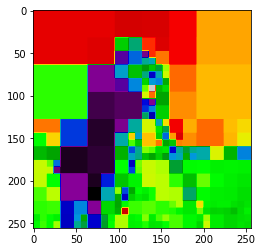

In [64]:
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()

## Predsplit avec comptage des contours

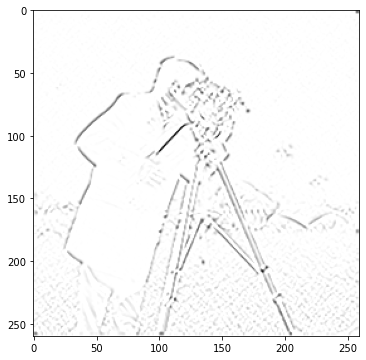

In [65]:
def SobelDetector(I, s):
    """ Array*double -> Array """
    Sx = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])
    Sy = np.array([[1,  2, 1],
                   [0,  0, 0],
                   [-1,-2,-1]])
    img = convolve2d(I,Sx)
    img = convolve2d(img,Sy)
    img = np.where(img > s, 0, img)
    return img

threshold = 0
contour = SobelDetector(cam, threshold)
imshow(contour)

In [66]:
def predsplit(I,R,*args):
    x,y,n,m = R
    threshold = 0
    img = SobelDetector(I[x:x+n,y:y+m], threshold)
    contour = np.nonzero(img)
    n_contour = len(contour[0])
#     print(n_contour > args[0] and n > args[1] and m > args[2]) # Je comprends pas trop pourquoi cela ne split rien car il y a des True et False 
    return n_contour > args[0] and n > args[1] and m > args[2]

nombre de region 226


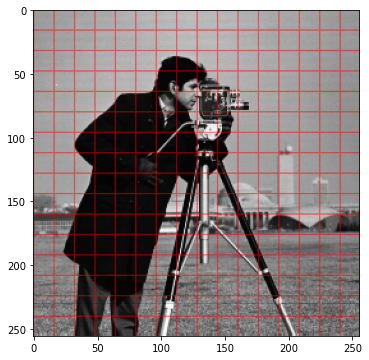

In [67]:
seuil_predsplit = 50
seuil_n = 20
seuil_m = 20
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
listreg = listRegions(qt)
borderimg = drawRegions(listreg, cam)
plt.imshow(cam)
plt.imshow(borderimg, alpha=0.5)
M = merge(qt,cam,5)
print("nombre de region",len(M))

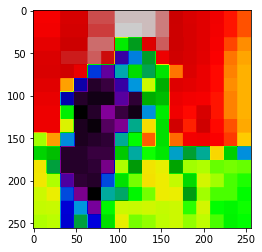

In [68]:
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()

# Test avec different predicat pour merge

In [143]:
# Predplit de base
def predsplit(I,R,*args):
    x,y,n,m = R
    std = I[x:x+n,y:y+m].std()
    return std > args[0] and n > args[1] and m > args[2]

## Predicat de fusion avec mean au lieu de std

In [148]:
def predmerge(b,R,*args):
    if b in R: return False
    x,y,w,h, size, mub,sigmab = b
    xr,yr,wr,hr, sizer, mur,sigmar = R[0]
    n = size + sizer
    mu = (size*mub + sizer*mub)/n
    if mu < args[0]:
        R[0] = xr,yr,wr,hr,n,mu,sigma
        return True
    return False

nombre de region 892


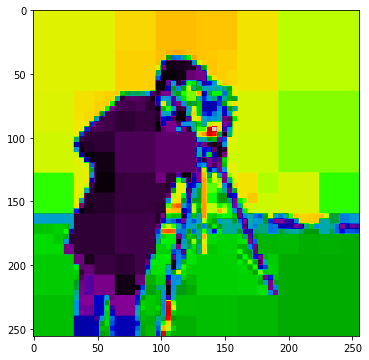

In [152]:
seuil_predsplit = 30
seuil_n = 7
seuil_m = 7
plt.figure(figsize=(500//80,500//80))
R_init = [0, 0, cam.shape[0], cam.shape[1]]
qt = split(cam, R_init, seuil_predsplit, seuil_n, seuil_m)
M = merge(qt,cam,5)
print("nombre de region",len(M))
plt.imshow(regions(M,cam.shape),cmap = "nipy_spectral")
plt.show()